In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,InputLayer,MaxPool2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy,mean_squared_error,mean_absolute_error
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lenc = LabelEncoder()
ohe = OneHotEncoder()

In [2]:
DATA_DIR = 'data'
IMAGE_DIR = f'../{DATA_DIR}/gestures'

image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    zoom_range=0.1,
    fill_mode='nearest',
    validation_split=0.2
    )

data_train = image_generator.flow_from_directory(
    IMAGE_DIR,
    target_size=(128,128),
    batch_size=256,
    class_mode='categorical',
    shuffle=True,
    subset = 'training'   
)

data_val = image_generator.flow_from_directory(
    IMAGE_DIR,
    target_size=(128,128),
    batch_size=256,
    class_mode='categorical',
    shuffle=True,
    subset = 'validation'   
)

N_CLASSES = data_train.num_classes

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [3]:
IMSIZE = (128,128,3)
N_CLASSES = data_train.num_classes

In [4]:
model = Sequential()
model.add(InputLayer(input_shape=IMSIZE))
model.add(Conv2D(64,(5,5),activation='relu',strides=(2,2),padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',strides=(2,2),padding='same'))

model.add(Conv2D(64,(1,1),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(1,1),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,(1,1),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(N_CLASSES,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])



2022-07-09 21:16:12.250695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 21:16:12.254912: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 21:16:12.255112: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 21:16:12.256126: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

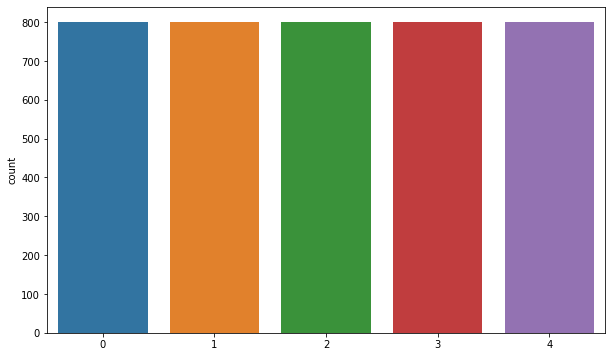

In [5]:
y = data_train.labels

plt.figure("countplot",figsize=(10,6))
sns.countplot(x=y.flatten())
plt.show()

In [6]:
model.optimizer.lr = 0.0001
model.optimizer.momentum = 0.9
with tf.device('/gpu:0'):
    history = model.fit_generator(data_train,epochs=100,validation_data=data_val)

/tmp/ipykernel_73566/1414883363.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_train,epochs=100,validation_data=data_val)


Epoch 1/100


2022-07-09 21:16:16.252855: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-07-09 21:16:16.694297: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


16/16 [==============================] - 23s 1s/step - loss: 1.5061 - accuracy: 0.3383 - val_loss: 1.1782 - val_accuracy: 0.6010
Epoch 2/100
16/16 [==============================] - 14s 862ms/step - loss: 1.0973 - accuracy: 0.5803 - val_loss: 0.8439 - val_accuracy: 0.7090
Epoch 3/100
16/16 [==============================] - 14s 863ms/step - loss: 0.8434 - accuracy: 0.7060 - val_loss: 0.7292 - val_accuracy: 0.7440
Epoch 4/100
16/16 [==============================] - 14s 873ms/step - loss: 0.6597 - accuracy: 0.7648 - val_loss: 0.7338 - val_accuracy: 0.7270
Epoch 5/100
16/16 [==============================] - 14s 879ms/step - loss: 0.5273 - accuracy: 0.8183 - val_loss: 0.4817 - val_accuracy: 0.8440
Epoch 6/100
16/16 [==============================] - 14s 903ms/step - loss: 0.3788 - accuracy: 0.8662 - val_loss: 0.4336 - val_accuracy: 0.8600
Epoch 7/100
16/16 [==============================] - 14s 858ms/step - loss: 0.3416 - accuracy: 0.8823 - val_loss: 0.3509 - val_accuracy: 0.8950
Epoch 8

In [7]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

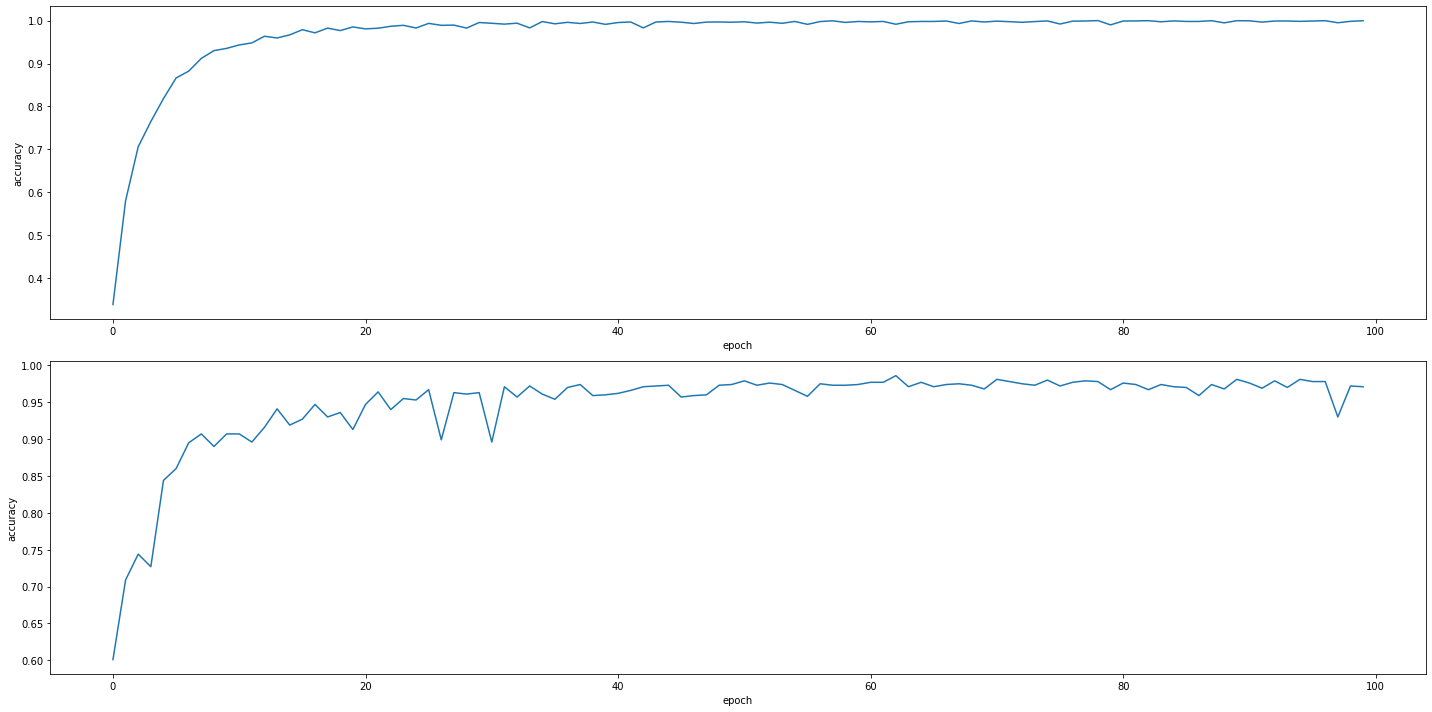

In [8]:
plt.figure("Model Metrics",(20,10))
plt.title('model accuracy')
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(2,1,2)
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.tight_layout()
plt.show()


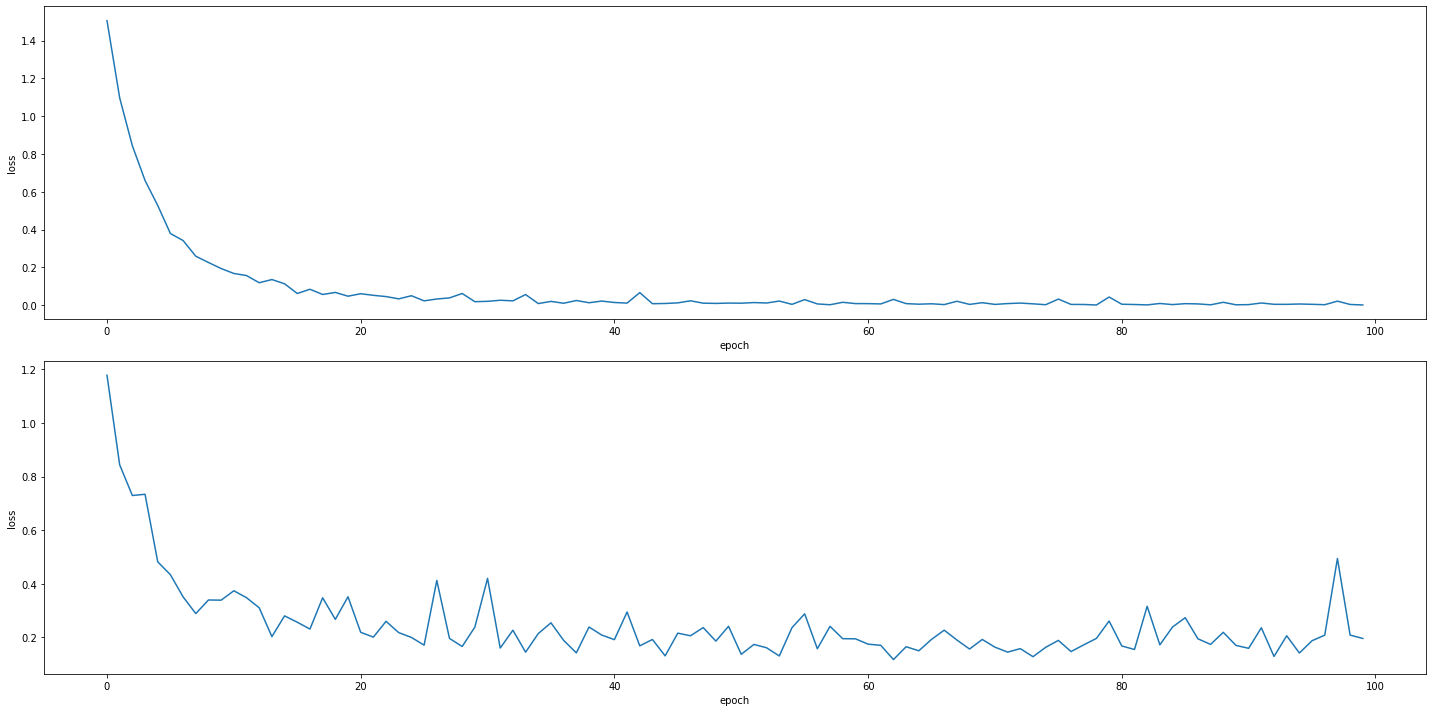

In [9]:
plt.figure("Model Metrics",(20,10))
plt.title('model accuracy')
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.subplot(2,1,2)
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.tight_layout()
plt.show()


In [10]:
model.save('../model/saved/scratch_model.h5')